# Causal Mediation Analysis

In the era of causal revolution, identifying the causal effect of an exposure on the outcome of interest is an important problem in many areas. Under a general causal graph, the exposure may have a direct effect on the outcome and also an indirect effect regulated by a set of mediators. An analysis of causal effects that interprets the causal mechanism contributed through mediators is hence challenging but on demand. 

## Analysis of Causal Effects with Causal Discovery

Identifying the causality among variables enables us to understand the key factors that influence the target variable, quantify the causal effect of an exposure on the outcome of interest, and use these effects to further guide downstream machine-learning tasks. In the following, we detail the analysis of causal effects (ANOCE) based on causal discovery proposed by Cai et al. (2020). 

### Analysis of Causal Effects from Treatment

Let $A$ be the exposure/treatment, $\mathbf{M}=[M_1,M_2,\cdots,M_p]^\top $ be mediators with dimension $p$, and $R$ be the outcome of interest. Suppose there exists a weighted DAG $\mathcal{G}=(\mathbf{Z},B)$ that characterizes the causal relationship among $\mathbf{Z}=[A, \mathbf{M}^\top, R]^\top $, where the dimension of $\mathbf{Z}$ is $d=p+2$.  We next give the total effect ($TE$), the natural direct effect that is not mediated by mediators ($DE$), and the natural indirect effect that is regulated by mediators ($IE$) defined in Pearl (2009).
\begin{equation*}
\begin{split}
TE &={\partial E\{R|do(A=a)\} / \partial a}= E\{R|do(A=a+1)\}-E\{R|do(A=a)\},\\
DE &= E\{R|do(A=a+1, \mathbf{M}=\mathbf{m}^{(a)})\}-E\{R|do(A=a)\},\\
IE &= E\{R|do(A=a, \mathbf{M}=\mathbf{m}^{(a+1)})\}-E\{R|do(A=a)\},
\end{split}
\end{equation*}
where $do(A=a)$ is a mathematical operator to simulate physical interventions that hold $A$ constant as $a$ while keeping the rest of the model unchanged, which corresponds to remove edges into $A$ and replace $A$ by the constant $a$ in $\mathcal{G}$. Here,  $\mathbf{m}^{(a)}$ is the value of $\mathbf{M}$ if setting $do(A=a)$, and $\mathbf{m}^{(a+1)}$ is the value of $\mathbf{M}$ if setting $do(A=a+1)$. Refer to \citet{pearl2009causal} for more details of 'do-operator'.

### Analysis of Causal Effects from Mediators

We first give the definition of the natural direct effect for an individual mediator ($DM$). 
\begin{equation}  
DM_i=  \Big[E\{M_i|do(A=a+1)\}-E\{M_i|do(A=a)\}\Big] \times \Big[E\{R|do(A=a, M_i=m^{(a)}_i+1, \Omega_i=o^{(a)}_i)\}- E\{R|do(A=a)\}\Big], 
\end{equation}
where $m^{(a)}_i$ is the value of $ M_i$ when setting $do(A=a)$, $\Omega_i=\mathbf{M}\setminus M_i$ is the set of mediators except $M_i$, and $o^{(a)}_i$ is the value of $\Omega_i$ when setting $do(A=a)$. 
The natural indirect effect for an individual mediator ($IM$) can be defined similarly.
\begin{equation*}\label{def_IM} 
IM_i= \Big[E\{M_i|do(A=a+1)\}-E\{M_i|do(A=a)\}\Big] \times \Big[E\{R|do(A=a, M_i=m^{(a)}_i+1)\}-E\{R|do(A=a, M_i=m^{(a)}_i+1, \Omega_i=o^{(a)}_i)\}\Big]. 
\end{equation*}

### Table of Analysis of Causal Effects

Based on the result $TE = DE+ IE$ in Pearl (2009) and above definitions, we summarize the defined causal effects and their relationship in Table 1 for the analysis of causal effects (ANOCE). Firstly, the causal effect of $A$ on $Y$ has two sources, the direct effect from $A$ and the indirect effect via $p$ mediators $\mathbf{M}$ ($M_1,\cdots, M_p$). Next, the direct source has the degree of freedom ($d.f.$) as 1, while the indirect source has $d.f.$ as $p$ from $p$ mediators. Note the true $d.f.$ of the indirect effect may be smaller than $p$, since $A$ may not be regulated by all mediators. Then, the causal effect for the direct source is the $DE$ and for the indirect source is the $IE$, where the $IE$ can be further decomposed into $p$ $DM$s and each component corresponds to the natural direct effect for a specific mediator. The last row in the table shows that the $DE$ and the $IE$ compose the total effect $TE$ with $d.f.$ as $p+1$. 

```{image} anoce.png
:alt: name
:width: 700px
:align: center
```
 

## ANOCE-CVAE Learner (Cai et al., 2020)

The ANOCE-CVAE learner (Cai et al., 2020) is constrained causal structure learning method by incorporating a novel identification constraint that specifies the temporal causal relationship of variables. The code is publicly available at an anonymous repository at https://github.com/anoce-cvae/ANOCE-CVAE.

The proposed algorithm is applied to investigate the causal effects of 2020 Hubei lockdowns on reducing the spread of the coronavirus in Chinese major cities out of Hubei.

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
from utils import *

In [2]:
%run train.py --data_type='realdata' --real_data_file='covid19.pkl' --epochs=100 --node_number=32 --sample_size=38 --batch_size=19 --rep_number=1



usage: train.py [-h] [--data_type {realdata,simulation,create_new}] [--real_data_file REAL_DATA_FILE]
                [--simu_G_file SIMU_G_FILE] [--graph_degree GRAPH_DEGREE] [--A_type A_TYPE]
                [--sample_size SAMPLE_SIZE] [--node_number NODE_NUMBER] [--seed SEED] [--rep_number REP_NUMBER]
                [--epochs EPOCHS] [--batch_size BATCH_SIZE] [--k_max_iter K_MAX_ITER] [--original_lr ORIGINAL_LR]
train.py: error: argument --data_type: invalid choice: "'realdata'" (choose from 'realdata', 'simulation', 'create_new')


AssertionError: 

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt  

# Load results
with open(os.path.join('', 'ANOCE_Results.data'), 'rb') as data:
    data = pickle.load(data)

# Calculate the estimated causal effects
TE, DE, IE, DM, IM = calculate_effect(data[0])

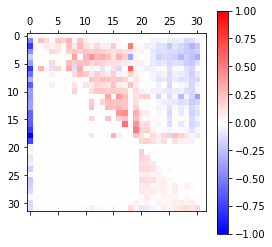

In [4]:
# Plot the estimated weighted adjacency matrix of B for the COVID-19 data
plt.matshow(data[0].T, cmap = 'bwr', vmin = -1, vmax = 1)
fig1 = plt.gcf()
plt.colorbar()
plt.show() 

In [5]:
# Analysis of causal effects of 2020 Hubei lockdowns on reducing the COVID-19 spread in China regulated by Chinese major cities outside Hubei
df = pd.DataFrame()
df['cities'] = np.array(pd.read_csv("covid19.csv").columns.values[1:31])
df['DM'] = np.round(np.array(DM).reshape(-1, 1), 3)
df['IM']=np.round(np.array(IM).reshape(-1, 1), 3)
df

,cities,DM,IM
0,Shenzhen,0.212,-0.026
1,Guangzhou,0.107,0.068
2,Beijing,0.039,0.043
3,Chengdu,0.084,0.018
4,Shanghai,0.018,0.072
5,Dongguan,0.072,0.027
6,Suzhou,-0.072,0.113
7,Xian,-0.055,0.045
8,Hangzhou,-0.104,0.097
9,Zhengzhou,-0.072,0.070


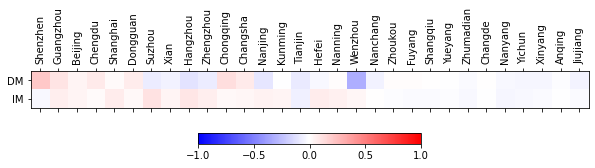

In [6]:
# Plot the estimated (in)direct effects for selected cities.
mt_data = np.zeros((2, 30))
mt_data[0, :] = DM
mt_data[1, :] = IM

fig = plt.figure(figsize = (10, 3))
ax = fig.add_subplot()
cax = ax.matshow(mt_data, cmap = 'bwr', vmin = -1, vmax = 1)
fig.colorbar(cax,shrink = 0.4, orientation = "horizontal")

cities_name = pd.read_csv("covid19.csv").columns.values[1: 31]
ax.set_xticks(np.arange(len(cities_name)))
ax.set_yticks(np.arange(len(['DM', 'IM'])))
ax.set_xticklabels(cities_name,rotation = 90)
ax.set_yticklabels(['DM', 'IM'])

plt.show() 
 

## References

[1] Judea Pearl et al. Causal inference in statistics: An overview. Statistics surveys, 3:96–146, 2009.

[2] Pater Spirtes, Clark Glymour, Richard Scheines, Stuart Kauffman, Valerio Aimale, and Frank Wimberly. Constructing bayesian network models of gene expression networks from microarray data. 2000.

[3] Markus Kalisch and Peter Bühlmann. Estimating high-dimensional directed acyclic graphs with the pc-algorithm. Journal of Machine Learning Research, 8(Mar):613–636, 2007.

[4] Rajen D Shah and Jonas Peters. The hardness of conditional independence testing and the generalised covariance measure. arXiv preprint arXiv:1804.07203, 2018.

[5] Shohei Shimizu, Patrik O Hoyer, Aapo Hyvärinen, and Antti Kerminen. A linear non-gaussian acyclic model for causal discovery. Journal of Machine Learning Research, 7(Oct):2003–2030, 2006.

[6] Peter Bühlmann, Jonas Peters, Jan Ernest, et al. Cam: Causal additive models, high-dimensional order search and penalized regression. The Annals of Statistics, 42(6):2526–2556, 2014.

[7] David Maxwell Chickering. Optimal structure identification with greedy search. Journal of machine learning research, 3(Nov):507–554, 2002.

[8] Joseph Ramsey, Madelyn Glymour, Ruben Sanchez-Romero, and Clark Glymour. A million variables and more: the fast greedy equivalence search algorithm for learning high-dimensional graphical causal models, with an application to functional magnetic resonance images. International journal of data science and analytics, 3(2):121–129, 2017.

[9] Xun Zheng, Bryon Aragam, Pradeep K Ravikumar, and Eric P Xing. Dags with no tears: Continuous optimization for structure learning. In Advances in Neural Information Processing Systems, pp. 9472–9483, 2018.

[10] Yue Yu, Jie Chen, Tian Gao, and Mo Yu. Dag-gnn: Dag structure learning with graph neural networks.
arXiv preprint arXiv:1904.10098, 2019.

[11] Shengyu Zhu and Zhitang Chen. Causal discovery with reinforcement learning. arXiv preprint arXiv:1906.04477, 2019.

[12] Cai, Hengrui, Rui Song, and Wenbin Lu. "ANOCE: Analysis of Causal Effects with Multiple Mediators via Constrained Structural Learning." International Conference on Learning Representations. 2020.